In [1]:
from pycaret.nlp import *
import pandas as pd      
import matplotlib.pyplot as plt    
import nltk    
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from nltk.corpus import stopwords 
%matplotlib inline  

In [2]:
df = pd.read_csv("spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace = True)
df.columns

Index(['v1', 'v2'], dtype='object')

In [8]:
df.rename(columns={'v1' : 'Flag' , 'v2' : 'SMS'},inplace = True)
df.head()

,Flag,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['Flag'].value_counts()

ham     4825
spam     747
Name: Flag, dtype: int64

In [10]:
df['Flag'].value_counts(normalize = True)*100

ham     86.593683
spam    13.406317
Name: Flag, dtype: float64

In [11]:
stop_word = stopwords.words('english')

In [12]:
stopword_setup = setup(df,
                       target='SMS',
      custom_stopwords=stop_word,
      session_id=123)

Description,Value
session_id,123
Documents,5572
Vocab Size,4127
Custom Stopwords,True


In [13]:
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


# nmf	Non-Negative Matrix Factorization 

In [14]:
nmf = create_model('nmf')

In [15]:
nmf

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=4, random_state=123, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [16]:
nmf_df = assign_model(nmf)
nmf_df

,Flag,SMS,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,ham,go point available great get,0.000000,0.000000,0.060610,0.025451,Topic 2,0.70
1,ham,,0.000000,0.000000,0.000000,0.000000,Topic 0,NaN
2,spam,free entry wkly may text receive entry questio...,0.001853,0.000596,0.000389,0.002376,Topic 3,0.46
3,ham,say early hor already say,0.001016,0.000200,0.008632,0.014292,Topic 3,0.59
4,ham,think go usf live around though,0.000136,0.000000,0.046305,0.001950,Topic 2,0.96
...,...,...,...,...,...,...,...,...
5567,spam,claim easy call minute,0.058309,0.000000,0.001508,0.000049,Topic 0,0.97
5568,ham,_ go esplanade home,0.001834,0.012268,0.099137,0.000000,Topic 2,0.88
5569,ham,pity mood suggestion,0.000000,0.000224,0.000358,0.000016,Topic 2,0.60
5570,ham,act interested buying else next week give free,0.002142,0.000750,0.001120,0.002604,Topic 3,0.39


In [17]:
nmf_df['Dominant_Topic'].value_counts()

Topic 3    2773
Topic 2    1268
Topic 0    1132
Topic 1     399
Name: Dominant_Topic, dtype: int64

In [18]:
nmf_df.columns

Index(['Flag', 'SMS', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3',
       'Dominant_Topic', 'Perc_Dominant_Topic'],
      dtype='object')

In [19]:
nmf_df.drop(columns=['SMS', 'Dominant_Topic','Perc_Dominant_Topic'],inplace = True)
nmf_df.columns

Index(['Flag', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3'], dtype='object')

In [20]:
nmf_df

,Flag,Topic_0,Topic_1,Topic_2,Topic_3
0,ham,0.000000,0.000000,0.060610,0.025451
1,ham,0.000000,0.000000,0.000000,0.000000
2,spam,0.001853,0.000596,0.000389,0.002376
3,ham,0.001016,0.000200,0.008632,0.014292
4,ham,0.000136,0.000000,0.046305,0.001950
...,...,...,...,...,...
5567,spam,0.058309,0.000000,0.001508,0.000049
5568,ham,0.001834,0.012268,0.099137,0.000000
5569,ham,0.000000,0.000224,0.000358,0.000016
5570,ham,0.002142,0.000750,0.001120,0.002604


In [21]:
nmf_df = nmf_df[[ 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Flag']]
nmf_df.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Flag
0,0.000000,0.000000,0.060610,0.025451,ham
1,0.000000,0.000000,0.000000,0.000000,ham
2,0.001853,0.000596,0.000389,0.002376,spam
3,0.001016,0.000200,0.008632,0.014292,ham
4,0.000136,0.000000,0.046305,0.001950,ham


In [22]:
from pycaret.classification import *

In [23]:
history = setup(nmf_df,
     target = 'Flag',
                silent = True,
     session_id = 123)

,Description,Value
0,session_id,123
1,Target,Flag
2,Target Type,Binary
3,Label Encoded,"ham: 0, spam: 1"
4,Original Data,"(5572, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
best = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9208,0.9097,0.5529,0.8116,0.6532,0.6106,0.6274,0.3570
rf,Random Forest Classifier,0.9177,0.9111,0.5791,0.7685,0.6561,0.6107,0.6210,0.4560
lightgbm,Light Gradient Boosting Machine,0.9115,0.9071,0.5545,0.7355,0.6312,0.5821,0.5902,0.1540
catboost,CatBoost Classifier,0.9095,0.9084,0.4925,0.7633,0.5975,0.5492,0.5666,4.6810
gbc,Gradient Boosting Classifier,0.9049,0.8927,0.4549,0.7550,0.5646,0.5151,0.5375,0.3630
ada,Ada Boost Classifier,0.8897,0.8800,0.4304,0.6459,0.5148,0.4556,0.4685,0.1500
dt,Decision Tree Classifier,0.8885,0.7416,0.5659,0.5991,0.5797,0.5157,0.5174,0.0280
knn,K Neighbors Classifier,0.8879,0.8427,0.4848,0.6191,0.5414,0.4789,0.4848,0.0540
lr,Logistic Regression,0.8636,0.7492,0.0000,0.0000,0.0000,0.0000,0.0000,0.7910
svm,SVM - Linear Kernel,0.8636,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0250


In [25]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9181,0.6981,0.7255,0.7115,0.6672,0.6673
1,0.9103,0.9118,0.5660,0.7143,0.6316,0.5813,0.5864
2,0.9179,0.9368,0.6226,0.7333,0.6735,0.6269,0.6297
3,0.9051,0.8982,0.5660,0.6818,0.6186,0.5649,0.5681
4,0.9128,0.8842,0.5283,0.7568,0.6222,0.5747,0.5866
5,0.9282,0.8856,0.6226,0.8049,0.7021,0.6621,0.6691
6,0.9205,0.9146,0.5094,0.8438,0.6353,0.5937,0.6176
7,0.9179,0.8950,0.6226,0.7333,0.6735,0.6269,0.6297
8,0.9205,0.9321,0.4815,0.8966,0.6265,0.5865,0.6221


In [28]:
tune_rf = tune_model(rf,n_iter=50,optimize='auc',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8538,0.8909,0.8113,0.4778,0.6014,0.5191,0.5464
1,0.8590,0.9156,0.7736,0.4881,0.5985,0.5183,0.5385
2,0.8538,0.9201,0.7925,0.4773,0.5957,0.5132,0.5378
3,0.8564,0.8904,0.7170,0.4810,0.5758,0.4933,0.5076
4,0.8538,0.8753,0.6792,0.4737,0.5581,0.4739,0.4849
5,0.8590,0.8895,0.7170,0.4872,0.5802,0.4991,0.5126
6,0.8872,0.9152,0.7925,0.5600,0.6562,0.5911,0.6039
7,0.8487,0.8985,0.7736,0.4659,0.5816,0.4961,0.5199
8,0.8564,0.9283,0.7222,0.4875,0.5821,0.4993,0.5134


/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will

/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute

In [26]:
blend_model = blend_models(best,optimize='auc',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9234,0.6792,0.7347,0.7059,0.6617,0.6624
1,0.9154,0.9187,0.5660,0.7500,0.6452,0.5982,0.6058
2,0.9256,0.9386,0.5849,0.8158,0.6813,0.6405,0.6519
3,0.9128,0.9000,0.5472,0.7436,0.6304,0.5823,0.5911
4,0.9154,0.8945,0.5283,0.7778,0.6292,0.5834,0.5973
5,0.9282,0.9113,0.6038,0.8205,0.6957,0.6560,0.6659
6,0.9231,0.9199,0.5283,0.8485,0.6512,0.6105,0.6322
7,0.9205,0.8959,0.6038,0.7619,0.6737,0.6291,0.6346
8,0.9077,0.9394,0.4444,0.8000,0.5714,0.5244,0.5529


In [27]:
stack_model = stack_models(best,optimize='auc',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9256,0.9278,0.6792,0.7500,0.7129,0.6703,0.6714
1,0.9179,0.9156,0.5660,0.7692,0.6522,0.6069,0.6161
2,0.9256,0.9412,0.5472,0.8529,0.6667,0.6271,0.6467
3,0.9154,0.9003,0.5472,0.7632,0.6374,0.5909,0.6014
4,0.9205,0.8952,0.5283,0.8235,0.6437,0.6013,0.6201
5,0.9333,0.9050,0.5849,0.8857,0.7045,0.6687,0.6870
6,0.9231,0.9179,0.5094,0.8710,0.6429,0.6030,0.6303
7,0.9179,0.8800,0.5660,0.7692,0.6522,0.6069,0.6161
8,0.9103,0.9387,0.4074,0.8800,0.5570,0.5144,0.5619


List of available plots (ID - Name):

    * 'auc' - Area Under the Curve
    * 'threshold' - Discrimination Threshold
    * 'pr' - Precision Recall Curve
    * 'confusion_matrix' - Confusion Matrix
    * 'error' - Class Prediction Error
    * 'class_report' - Classification Report
    * 'boundary' - Decision Boundary
    * 'rfe' - Recursive Feature Selection
    * 'learning' - Learning Curve
    * 'manifold' - Manifold Learning
    * 'calibration' - Calibration Curve
    * 'vc' - Validation Curve
    * 'dimension' - Dimension Learning
    * 'feature' - Feature Importance
    * 'feature_all' - Feature Importance (All)
    * 'parameter' - Model Hyperparameter
    * 'lift' - Lift Curve
    * 'gain' - Gain Chart
    * 'tree' - Decision Tree
    * 'ks' - KS Statistic Plot

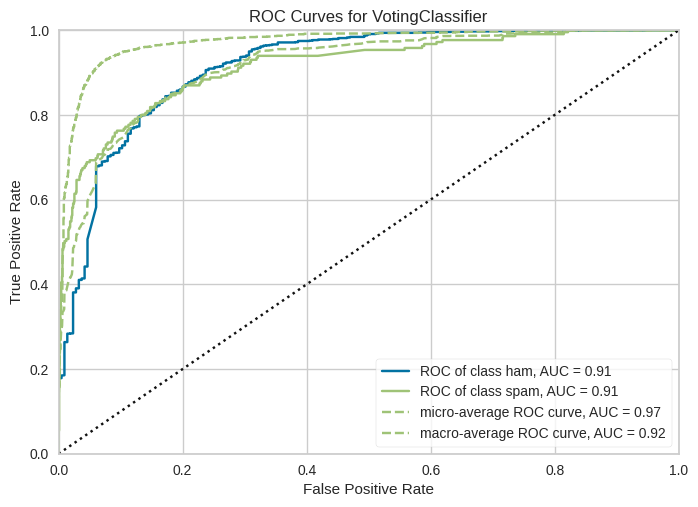

In [29]:
plot_model(blend_model,'auc')

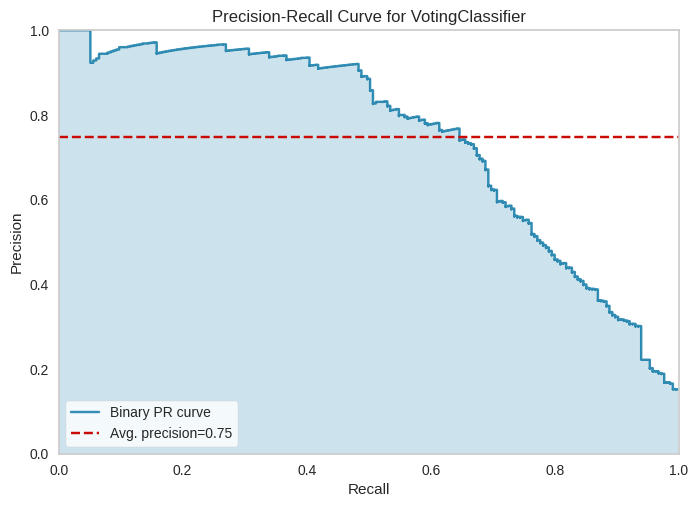

In [30]:
plot_model(blend_model,'pr')

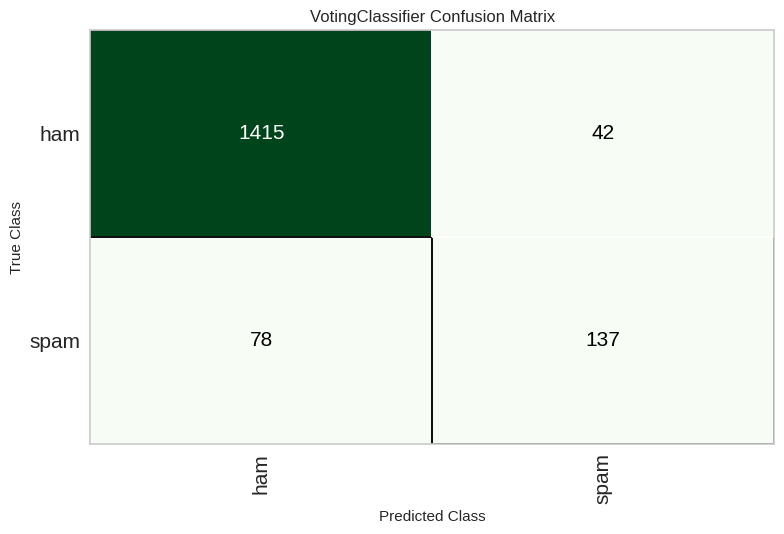

In [31]:
plot_model(blend_model,'confusion_matrix')

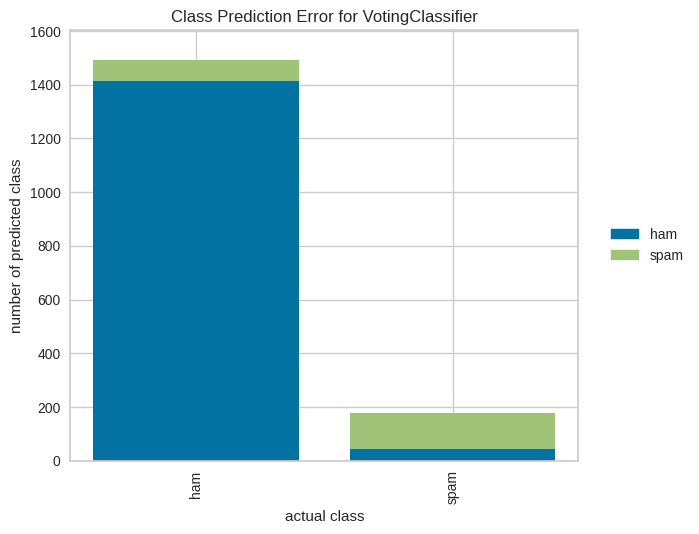

In [32]:
plot_model(blend_model,'error')

In [33]:
prediction = predict_model(blend_model)
prediction 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9282,0.9147,0.6372,0.7654,0.6954,0.6551,0.6587


,Topic_0,Topic_1,Topic_2,Topic_3,Flag,Label,Score
0,0.000651,0.000793,0.002773,0.005113,ham,ham,0.9928
1,0.146344,0.000000,0.000000,0.000000,spam,spam,0.6076
2,0.000723,0.000795,0.004344,0.004522,ham,ham,0.9995
3,0.000683,0.000000,0.001448,0.003177,spam,spam,0.7227
4,0.000000,0.000000,0.000000,0.000000,ham,ham,0.9774
...,...,...,...,...,...,...,...
1667,0.000200,0.000378,0.000802,0.000880,ham,ham,0.9883
1668,0.000015,0.000023,0.002724,0.010603,ham,ham,0.9752
1669,0.000466,0.000203,0.002540,0.003755,ham,ham,0.9083
1670,0.000032,0.000000,0.036014,0.040097,ham,ham,0.7968


In [34]:
prediction[prediction['Flag']=='ham'][0:10]

,Topic_0,Topic_1,Topic_2,Topic_3,Flag,Label,Score
0,0.000651,0.000793,0.002773,0.005113,ham,ham,0.9928
2,0.000723,0.000795,0.004344,0.004522,ham,ham,0.9995
4,0.000000,0.000000,0.000000,0.000000,ham,ham,0.9774
5,0.002083,0.007557,0.048069,0.004321,ham,ham,0.9932
6,0.000105,0.000000,0.039640,0.000843,ham,ham,0.9990
7,0.000590,0.001975,0.003674,0.001808,ham,ham,0.9624
8,0.003501,0.000549,0.003926,0.001870,ham,ham,0.9871
9,0.001859,0.000039,0.000924,0.004123,ham,ham,0.7842
11,0.000000,0.001734,0.003640,0.009074,ham,ham,0.9998
12,0.000176,0.000000,0.000000,0.001873,ham,ham,0.8758


In [35]:
prediction[prediction['Flag']=='spam'][0:10]

,Topic_0,Topic_1,Topic_2,Topic_3,Flag,Label,Score
1,0.146344,0.000000,0.000000,0.000000,spam,spam,0.6076
3,0.000683,0.000000,0.001448,0.003177,spam,spam,0.7227
10,0.042893,0.000241,0.000236,0.001147,spam,spam,0.8064
13,0.052705,0.001482,0.001815,0.000406,spam,ham,0.8181
31,0.000000,0.000087,0.000353,0.002258,spam,ham,0.9530
51,0.001908,0.000098,0.002387,0.004174,spam,spam,0.5844
55,0.054850,0.000000,0.000000,0.012013,spam,spam,0.9763
75,0.018499,0.000000,0.000113,0.000000,spam,spam,0.9526
80,0.087920,0.000000,0.000000,0.002332,spam,spam,0.9062
83,0.002576,0.000414,0.000355,0.012188,spam,spam,0.9116


In [36]:
print(confusion_matrix(prediction['Flag'],prediction['Label']))

[[1415   42]
 [  78  137]]


In [37]:
print(classification_report(prediction['Flag'],prediction['Label']))

              precision    recall  f1-score   support

         ham       0.95      0.97      0.96      1457
        spam       0.77      0.64      0.70       215

    accuracy                           0.93      1672
   macro avg       0.86      0.80      0.83      1672
weighted avg       0.92      0.93      0.93      1672



In [38]:
final =finalize_model(blend_model)
final

VotingClassifier(estimators=[('et',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                 

In [40]:
save_model(final,'spam24-11-2022_blend_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Flag',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                                               learning_rate=0.1,
                                                               max_depth=-1,
                                                               min_child_samples=20,
                              

# lda	Latent Dirichlet Allocation

In [97]:
from pycaret.nlp import *
import pandas as pd      
import matplotlib.pyplot as plt    
import nltk    
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from nltk.corpus import stopwords 
%matplotlib inline  

In [98]:
df = pd.read_csv("spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [100]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [101]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [102]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [103]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace = True)
df.columns

Index(['v1', 'v2'], dtype='object')

In [104]:
df.rename(columns={'v1' : 'Flag' , 'v2' : 'SMS'},inplace = True)
df.head()

,Flag,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [105]:
df['Flag'].value_counts()

ham     4825
spam     747
Name: Flag, dtype: int64

In [106]:
df['Flag'].value_counts(normalize = True)*100

ham     86.593683
spam    13.406317
Name: Flag, dtype: float64

In [107]:
stop_word = stopwords.words('english')

In [108]:
stopword_setup = setup(df,target='SMS',custom_stopwords=stop_word,session_id=123)

Description,Value
session_id,123
Documents,5572
Vocab Size,4127
Custom Stopwords,True


In [109]:
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


In [110]:
lda = create_model('lda',multi_core=True)

In [111]:
lda_df = assign_model(lda)
lda_df

,Flag,SMS,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,ham,go point available great get,0.042619,0.045502,0.867942,0.043936,Topic 2,0.87
1,ham,,0.250000,0.250000,0.250000,0.250000,Topic 0,0.25
2,spam,free entry wkly may text receive entry questio...,0.019473,0.019451,0.941687,0.019388,Topic 2,0.94
3,ham,say early hor already say,0.041958,0.042557,0.041741,0.873744,Topic 3,0.87
4,ham,think go usf live around though,0.036089,0.888056,0.037234,0.038621,Topic 1,0.89
...,...,...,...,...,...,...,...,...
5567,spam,claim easy call minute,0.050402,0.050369,0.848713,0.050516,Topic 2,0.85
5568,ham,_ go esplanade home,0.613189,0.050965,0.283253,0.052593,Topic 0,0.61
5569,ham,pity mood suggestion,0.062549,0.812400,0.062525,0.062526,Topic 1,0.81
5570,ham,act interested buying else next week give free,0.027925,0.028439,0.297286,0.646350,Topic 3,0.65


In [112]:
lda_df['Dominant_Topic'].value_counts()

Topic 0    1499
Topic 1    1419
Topic 3    1399
Topic 2    1255
Name: Dominant_Topic, dtype: int64

In [113]:
lda_df.columns

Index(['Flag', 'SMS', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3',
       'Dominant_Topic', 'Perc_Dominant_Topic'],
      dtype='object')

In [114]:
lda_df.drop(columns=['SMS', 'Dominant_Topic','Perc_Dominant_Topic'],inplace = True)
lda_df.columns

Index(['Flag', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3'], dtype='object')

In [115]:
lda_df

,Flag,Topic_0,Topic_1,Topic_2,Topic_3
0,ham,0.042619,0.045502,0.867942,0.043936
1,ham,0.250000,0.250000,0.250000,0.250000
2,spam,0.019473,0.019451,0.941687,0.019388
3,ham,0.041958,0.042557,0.041741,0.873744
4,ham,0.036089,0.888056,0.037234,0.038621
...,...,...,...,...,...
5567,spam,0.050402,0.050369,0.848713,0.050516
5568,ham,0.613189,0.050965,0.283253,0.052593
5569,ham,0.062549,0.812400,0.062525,0.062526
5570,ham,0.027925,0.028439,0.297286,0.646350


In [116]:
lda_df = lda_df[[ 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Flag']]
lda_df.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Flag
0,0.042619,0.045502,0.867942,0.043936,ham
1,0.250000,0.250000,0.250000,0.250000,ham
2,0.019473,0.019451,0.941687,0.019388,spam
3,0.041958,0.042557,0.041741,0.873744,ham
4,0.036089,0.888056,0.037234,0.038621,ham


In [117]:
from pycaret.classification import *

In [118]:
history = setup(lda_df,
     target = 'Flag',
                silent = True,
     session_id = 123)

,Description,Value
0,session_id,123
1,Target,Flag
2,Target Type,Binary
3,Label Encoded,"ham: 0, spam: 1"
4,Original Data,"(5572, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [119]:
best = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9267,0.9066,0.6410,0.7880,0.7044,0.6632,0.6693,0.5710
lightgbm,Light Gradient Boosting Machine,0.9205,0.8962,0.6014,0.7711,0.6731,0.6288,0.6366,0.1530
catboost,CatBoost Classifier,0.9195,0.9073,0.5770,0.7791,0.6604,0.6161,0.6264,4.8260
et,Extra Trees Classifier,0.9164,0.9005,0.6370,0.7201,0.6730,0.6255,0.6288,0.3180
gbc,Gradient Boosting Classifier,0.9138,0.8999,0.5375,0.7631,0.6292,0.5822,0.5945,0.4210
ada,Ada Boost Classifier,0.9028,0.8847,0.4773,0.7167,0.5712,0.5191,0.5336,0.2040
knn,K Neighbors Classifier,0.9005,0.8468,0.5374,0.6717,0.5953,0.5395,0.5449,0.0440
dt,Decision Tree Classifier,0.9003,0.7920,0.6599,0.6275,0.6421,0.5843,0.5853,0.0260
lr,Logistic Regression,0.8885,0.8279,0.3007,0.7223,0.4229,0.3727,0.4176,1.5110
ridge,Ridge Classifier,0.8808,0.0000,0.1468,0.8795,0.2498,0.2198,0.3280,0.0160


In [120]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9308,0.9514,0.7358,0.7500,0.7429,0.7029,0.7029
1,0.9205,0.9082,0.6415,0.7391,0.6869,0.6416,0.6437
2,0.9282,0.9092,0.6226,0.8049,0.7021,0.6621,0.6691
3,0.9179,0.8758,0.5660,0.7692,0.6522,0.6069,0.6161
4,0.9385,0.8837,0.6604,0.8537,0.7447,0.7103,0.7179
5,0.9256,0.9174,0.6226,0.7857,0.6947,0.6530,0.6588
6,0.9103,0.8986,0.6792,0.6667,0.6729,0.6209,0.6209
7,0.9256,0.8719,0.5849,0.8158,0.6813,0.6405,0.6519
8,0.9385,0.9369,0.6296,0.8947,0.7391,0.7054,0.7194


In [123]:
tune_rf = tune_model(rf,n_iter=50,optimize='auc',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9128,0.9387,0.6415,0.6939,0.6667,0.6166,0.6172
1,0.9128,0.9118,0.5472,0.7436,0.6304,0.5823,0.5911
2,0.9231,0.9071,0.5472,0.8286,0.6591,0.6178,0.6347
3,0.9103,0.8713,0.5283,0.7368,0.6154,0.5661,0.5762
4,0.9205,0.8848,0.5660,0.7895,0.6593,0.6157,0.6267
5,0.9051,0.9195,0.4906,0.7222,0.5843,0.5329,0.5456
6,0.9051,0.8969,0.5660,0.6818,0.6186,0.5649,0.5681
7,0.9128,0.9018,0.5283,0.7568,0.6222,0.5747,0.5866
8,0.9205,0.9311,0.5185,0.8485,0.6437,0.6019,0.6250


/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(m

/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/rotimi123/anaconda3/envs/pycaret_notabook/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(m

In [121]:
blend_model = blend_models(best,optimize='auc',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9256,0.9463,0.7170,0.7308,0.7238,0.6809,0.6809
1,0.9231,0.9221,0.6415,0.7556,0.6939,0.6502,0.6531
2,0.9308,0.9173,0.5660,0.8824,0.6897,0.6528,0.6732
3,0.9179,0.8751,0.5283,0.8000,0.6364,0.5923,0.6085
4,0.9256,0.8970,0.5660,0.8333,0.6742,0.6339,0.6490
5,0.9179,0.9204,0.5472,0.7838,0.6444,0.5997,0.6121
6,0.9128,0.9094,0.6226,0.7021,0.6600,0.6102,0.6117
7,0.9179,0.8966,0.5660,0.7692,0.6522,0.6069,0.6161
8,0.9256,0.9344,0.5556,0.8571,0.6742,0.6343,0.6534


In [122]:
stack_model = stack_models(best,optimize='auc',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9282,0.9405,0.6604,0.7778,0.7143,0.6735,0.6765
1,0.9256,0.9181,0.6038,0.8000,0.6882,0.6469,0.6552
2,0.9308,0.8838,0.5660,0.8824,0.6897,0.6528,0.6732
3,0.9128,0.8617,0.4717,0.8065,0.5952,0.5501,0.5750
4,0.9333,0.8971,0.6038,0.8649,0.7111,0.6748,0.6887
5,0.9179,0.9169,0.5472,0.7838,0.6444,0.5997,0.6121
6,0.9231,0.9129,0.6604,0.7447,0.7000,0.6561,0.6576
7,0.9205,0.8896,0.5283,0.8235,0.6437,0.6013,0.6201
8,0.9308,0.9279,0.5741,0.8857,0.6966,0.6596,0.6793


List of available plots (ID - Name):

    * 'auc' - Area Under the Curve
    * 'threshold' - Discrimination Threshold
    * 'pr' - Precision Recall Curve
    * 'confusion_matrix' - Confusion Matrix
    * 'error' - Class Prediction Error
    * 'class_report' - Classification Report
    * 'boundary' - Decision Boundary
    * 'rfe' - Recursive Feature Selection
    * 'learning' - Learning Curve
    * 'manifold' - Manifold Learning
    * 'calibration' - Calibration Curve
    * 'vc' - Validation Curve
    * 'dimension' - Dimension Learning
    * 'feature' - Feature Importance
    * 'feature_all' - Feature Importance (All)
    * 'parameter' - Model Hyperparameter
    * 'lift' - Lift Curve
    * 'gain' - Gain Chart
    * 'tree' - Decision Tree
    * 'ks' - KS Statistic Plot

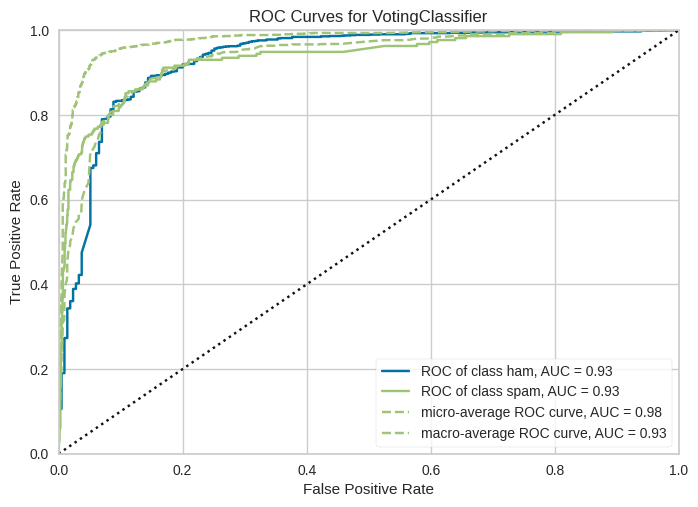

In [124]:
plot_model(blend_model,'auc')

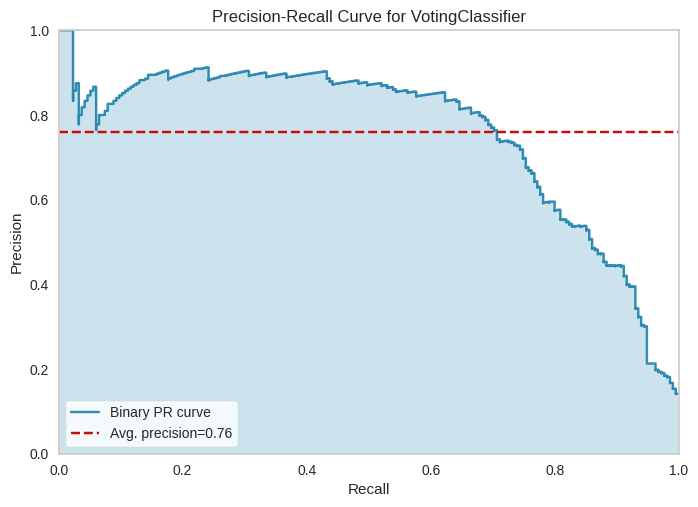

In [125]:
plot_model(blend_model,'pr')

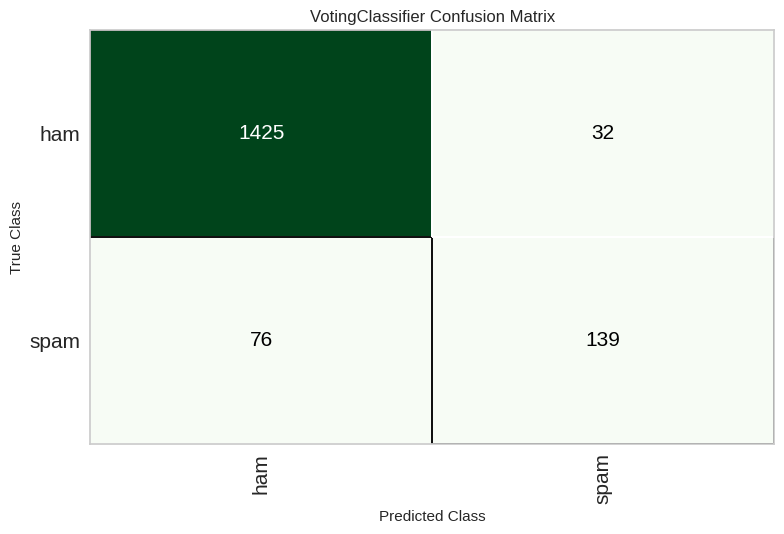

In [126]:
plot_model(blend_model,'confusion_matrix')

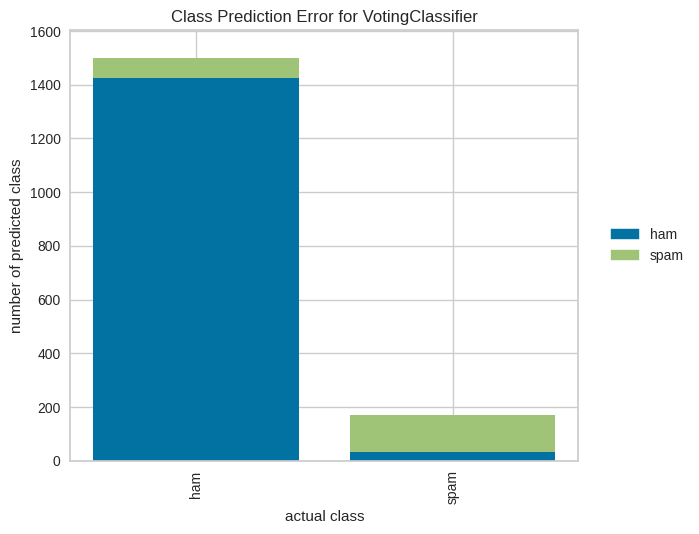

In [127]:
plot_model(blend_model,'error')

In [128]:
prediction = predict_model(blend_model)
prediction 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9354,0.9328,0.6465,0.8129,0.7202,0.6842,0.6900


,Topic_0,Topic_1,Topic_2,Topic_3,Flag,Label,Score
0,0.083351,0.086793,0.083717,0.746139,ham,ham,0.9977
1,0.084549,0.083439,0.748676,0.083336,spam,spam,0.6071
2,0.041699,0.044045,0.041912,0.872344,ham,ham,0.9938
3,0.577039,0.041677,0.338414,0.042870,spam,spam,0.7502
4,0.250000,0.250000,0.250000,0.250000,ham,ham,0.9812
...,...,...,...,...,...,...,...
1667,0.643129,0.043199,0.269956,0.043716,ham,ham,0.9428
1668,0.125003,0.624992,0.125003,0.125003,ham,ham,0.9953
1669,0.869963,0.043173,0.042468,0.044397,ham,ham,0.9679
1670,0.028997,0.537346,0.404293,0.029364,ham,ham,0.8895


In [129]:
prediction[prediction['Flag']=='ham'][0:10]

,Topic_0,Topic_1,Topic_2,Topic_3,Flag,Label,Score
0,0.083351,0.086793,0.083717,0.746139,ham,ham,0.9977
2,0.041699,0.044045,0.041912,0.872344,ham,ham,0.9938
4,0.250000,0.250000,0.250000,0.250000,ham,ham,0.9812
5,0.904132,0.031765,0.031529,0.032574,ham,ham,0.8468
6,0.036964,0.036509,0.038060,0.888466,ham,ham,0.8024
7,0.035724,0.035722,0.177831,0.750723,ham,ham,0.8770
8,0.624982,0.125006,0.125006,0.125006,ham,ham,0.9877
9,0.129006,0.125006,0.127640,0.618347,ham,ham,0.9918
11,0.065125,0.809644,0.062720,0.062510,ham,ham,0.9948
12,0.107464,0.083360,0.725812,0.083363,ham,ham,0.9403


In [130]:
prediction[prediction['Flag']=='spam'][0:10]

,Topic_0,Topic_1,Topic_2,Topic_3,Flag,Label,Score
1,0.084549,0.083439,0.748676,0.083336,spam,spam,0.6071
3,0.577039,0.041677,0.338414,0.042870,spam,spam,0.7502
10,0.041846,0.041699,0.874238,0.042218,spam,spam,0.8680
13,0.111648,0.020493,0.602483,0.265376,spam,spam,0.7598
31,0.050681,0.050023,0.650484,0.248812,spam,ham,0.8784
51,0.045276,0.208103,0.702970,0.043651,spam,ham,0.8576
55,0.042179,0.041689,0.874071,0.042062,spam,spam,0.8781
75,0.721712,0.225077,0.027796,0.025415,spam,spam,0.6192
80,0.028148,0.027891,0.916127,0.027834,spam,spam,0.9662
83,0.020931,0.020925,0.937144,0.021001,spam,spam,0.9818


In [131]:
print(confusion_matrix(prediction['Flag'],prediction['Label']))

[[1425   32]
 [  76  139]]


In [132]:
print(classification_report(prediction['Flag'],prediction['Label']))

              precision    recall  f1-score   support

         ham       0.95      0.98      0.96      1457
        spam       0.81      0.65      0.72       215

    accuracy                           0.94      1672
   macro avg       0.88      0.81      0.84      1672
weighted avg       0.93      0.94      0.93      1672



In [133]:
print(classification_report_imbalanced(prediction['Flag'],prediction['Label']))

                   pre       rec       spe        f1       geo       iba       sup

        ham       0.95      0.98      0.65      0.96      0.80      0.65      1457
       spam       0.81      0.65      0.98      0.72      0.80      0.61       215

avg / total       0.93      0.94      0.69      0.93      0.80      0.65      1672



In [134]:
final =finalize_model(blend_model)
final

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [ ]:
save_model(final,'spam_24-11-2022_blend_model')